In [275]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('darkgrid')

## Nutrition Wake-Up Call: Decoding the Ingredients in Your Daily Starbucks Fix

Picture this. It's Monday morning, and you're on your way to work. You stop by your local Starbucks, grab your favorite drink or frappuccino, and enjoy it throughout the morning. You feel the caffeine and rush of energy from the sugar, and you're feeling good on a Monday morning.

Now, picture this, it's 1 pm. You just got back from lunch and sit down behind your laptop. Your eyes are heavy and there's a headache growing behind your eyes. Your energy is low and you really don't feel like cranking out another 4 hours of work. It's miserable. The only thing you want to do is close your laptop and take a nap. 

I know I've been there so many times. I think many people have, and I believe it's primarily because of what we're putting in our bodies.

Nutrition is the single most important factor in overall health and well-being.

It drives how we sleep, how we feel when we wake up, our mood, our motivation—every factor any reasonable person would say is an important part of life and every factor that contributes to how we feel every single day.

At least for me, when my body feels good, I feel motivated to sit down and do my best work. And when my body feels, bad, wether it's a headache or just an overall feeling or low energy, it's the exact opposite.  

So why then does it seem most people throw nutrition out the window or fail to consider how what they're putting in their bodies impacts those important factors?

Well, for one thing, it's easy to do so. Let's look at Starbucks. According to the coffee giant themselves, over 60 million people visit their stores every single week. For many, it's become entrenched as part of their daily routine like the scenario above, and I'm willing to bet for most of those 60 million visitors, a drink from Starbucks is the first "nutrition" their body sees in the morning.

I often work from a large Starbucks that's right below my apartment. It's a two-minute walk, and it's a nice way to get out of the house. This particular Starbucks is located in the middle of a very busy complex filled with businesses, shopping opportunities, and apartment complexes.

I see many of the same people come in each day, order their drinks, and get on with their days.

Seeing what most people order, it's no wonder many people struggle with nutrition and an overall sense of not feeling great. Starbucks drinks are full of sugars, fats (not the good kinds!), and loaded with cholesterol. A typical drink from Starbucks in the morning is a recipe for a crash and a headache in the afternoon. 

Let's take a look at the Starbucks drink menu to understand just what you're putting in your body every time you order your favorite drink. 

We'll start with the obvious first. Sugar. 

Sugar can impare focus, kill your mood, cause higher than normal stress, and impare your memory. (In a real story, I'd probably dive deeper into the evidence of this!)

And yet, most people consume sugar in access on a daily basis, many may not even know how much sugar they're consuming when they stop by starbucks on the way to work.

The American Heart Association Reccomends no more than 36 grams of added sugar per day. Out of every drink on the menu, let's see what % of drinks have more than that.

Then we'll examine the sugar content of some of starbucks most popular drinks, their Frappuccinos. Every drink examined is examined in it's 12oz form, aka it's SMALL form. 

In [159]:
starbs = pd.read_csv('starbucks_drinkMenu_expanded.csv')

In [190]:
starbs = starbs[starbs['Caffeine (mg)'] != 'Varies']

In [206]:
starbs = starbs[starbs['Caffeine (mg)'] != 'varies']

In [208]:
starbs['Caffeine (mg)'] = starbs['Caffeine (mg)'].astype(float)

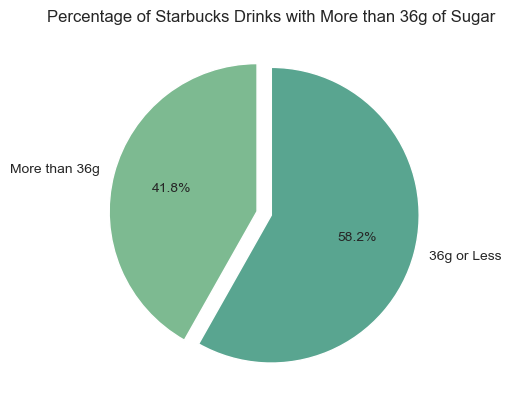

In [247]:
more_than_36g = starbs[starbs[' Sugars (g)'] > 36].shape[0]

less_than_or_equal_36g = starbs.shape[0] - more_than_36g
labels = ['More than 36g', '36g or Less']
sizes = [more_than_36g, less_than_or_equal_36g]
colors = sns.color_palette('crest')[0:5]
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Starbucks Drinks with More than 36g of Sugar')
plt.savefig('Pie Chart.png')
plt.show()

So almost 40% of the drinks on the Starbucks menu contain more than the daily reccomended sugar intake, and these are just the small sizes! Think about that, for every small drink at Starbucks, 40% of them contain MORE than the daily reccomended added sugar intake. 


Let's take a deeper look at the frapps, this is where it gets scary. 

In [210]:
frappuccino_df = starbs[starbs['Beverage_category'].str.contains('Frappuccino')]

frappuccino_df_sorted = frappuccino_df.sort_values(by=' Sugars (g)', ascending=False)

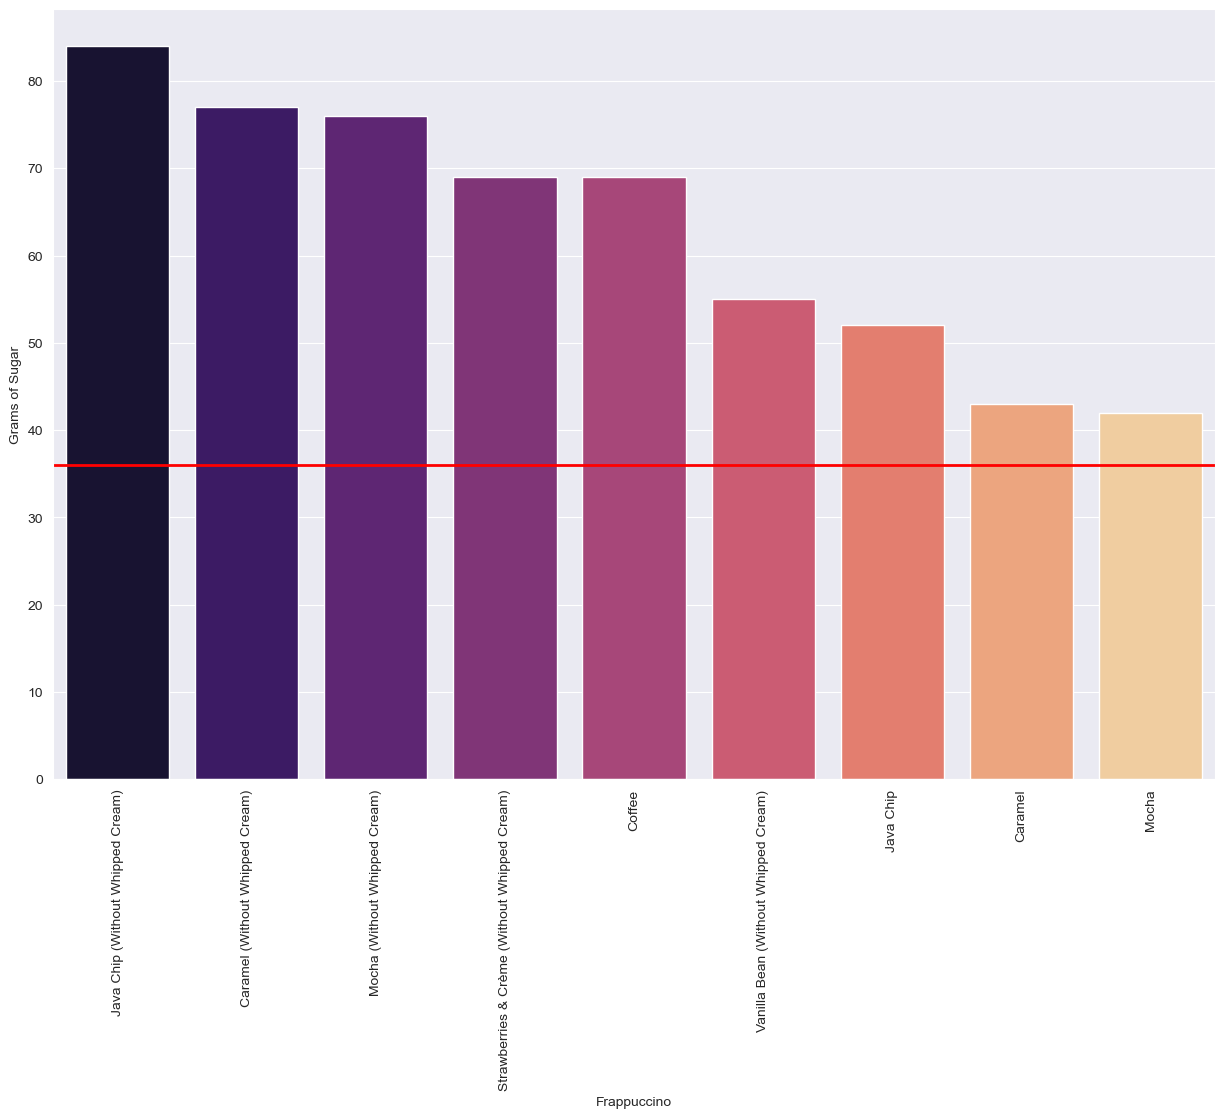

In [260]:
plt.figure(figsize = (15,10))
ax = sns.barplot(data = frappuccino_df_sorted, x = 'Beverage', y = ' Sugars (g)', palette = 'magma',errorbar = None, estimator = 'max')
ax.axhline(y=36, color='red', linestyle='-', linewidth=2)
plt.xticks(rotation=90)
plt.xlabel('Frappuccino')
plt.ylabel('Grams of Sugar')
plt.savefig('Frapp Sugar.png',bbox_inches = 'tight', pad_inches = 1)

Almost all of the most popular fraps from starbucks contain more than that in the small. Look at the Java Chip with over 80 grams of sugar! Most people don't order small, I know I dont. 

If you're starting your day with more than the daily recommend addded sugar intake, you're setting yourself up to feel it later, and if you're doing this consistenly every day, you're creating a cycle that will lead you to feel worse and worse over time.  You'll be more tired, have less energy, and less motivation to get things done. Your work will suffer as a result.

Next time you're thinking of starting your morning with a Starbucks frappuccino, maybe reconsider. 

Let's look at another popular category of drink, their classic espresso drinks. 

In [212]:
classic_espresso_df = starbs[starbs['Beverage_category'].str.contains('Classic Espresso')]

classic_espresso_df_sorted = classic_espresso_df.sort_values(by=' Sugars (g)', ascending=False)

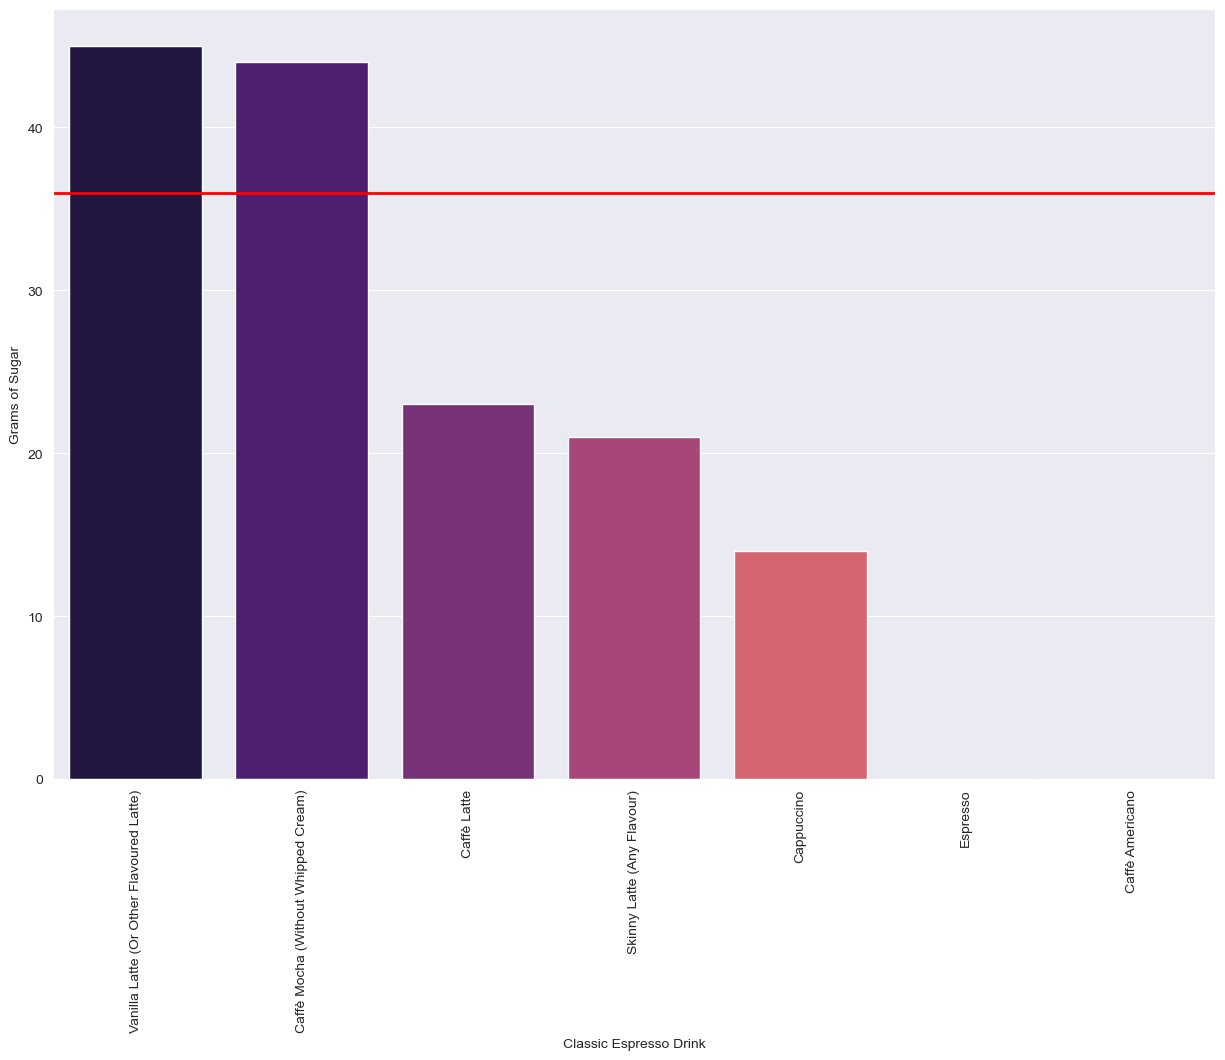

In [259]:
plt.figure(figsize = (15,10))
ax = sns.barplot(data = classic_espresso_df_sorted, x = 'Beverage', y = ' Sugars (g)', palette = 'magma',errorbar = None, estimator = 'max')
ax.axhline(y=36, color='red', linestyle='-', linewidth=2)
plt.xticks(rotation=90)
plt.xlabel('Classic Espresso Drink')
plt.ylabel('Grams of Sugar')
plt.savefig('Classic Espresso Sugar.png',bbox_inches = 'tight', pad_inches = 1)

The classic drinks fare better, but for some of the most popular ones, like the Vanilla Latte, you're still exceeding the daily recommended value from a single drink.

Let's say you order the Caffè Latte; it's still over half the recommended amount, and you haven't even had breakfast yet!

When you order a drink like this from Starbucks in the morning, you're setting yourself up for that 1pm headache and crash later. Let's look at every drink on the menu and their sugar content. 

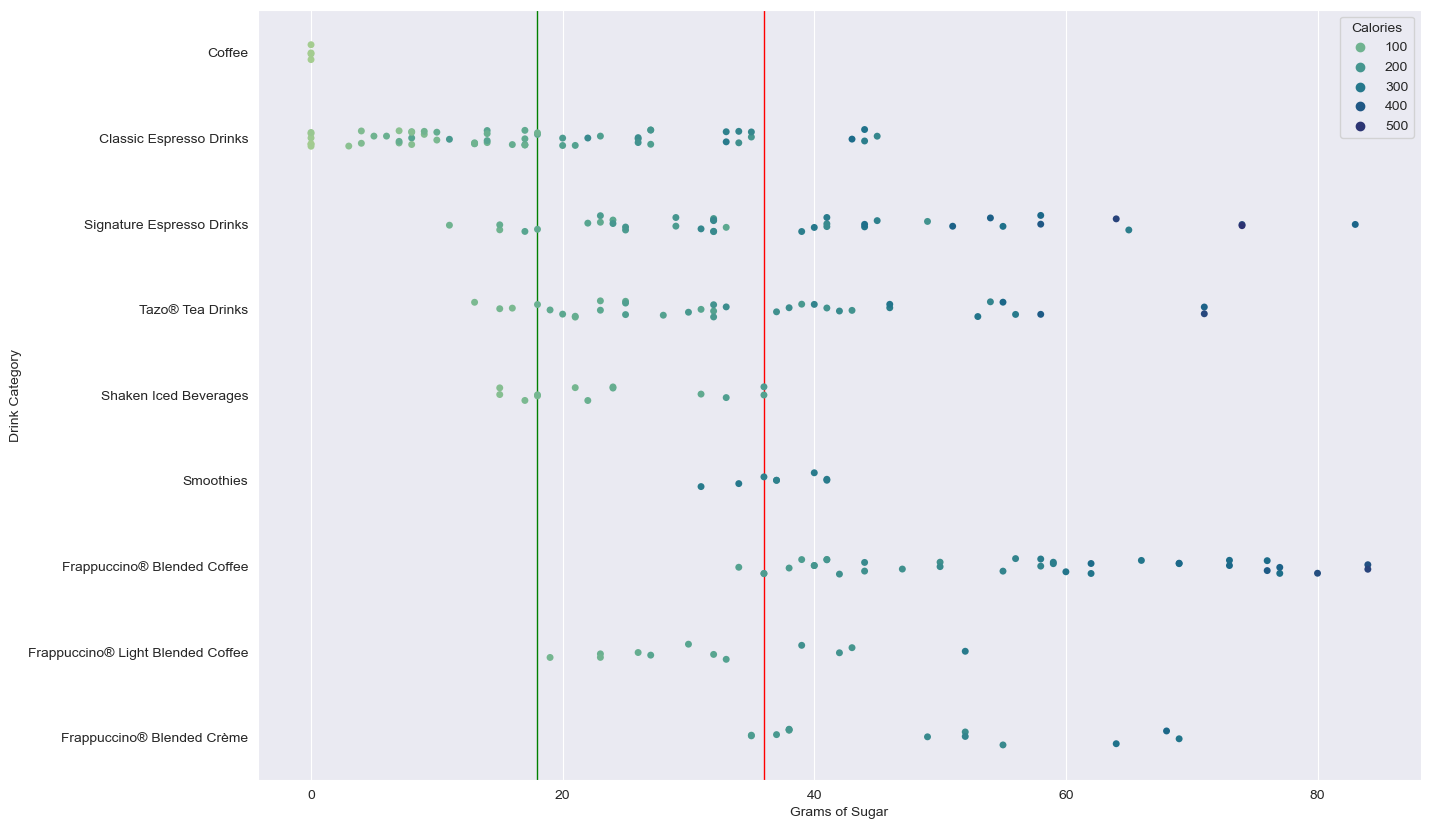

In [257]:
plt.figure(figsize = (15, 10))
ax2 = sns.stripplot(data=starbs, x=' Sugars (g)', y='Beverage_category', hue = 'Calories',palette = 'crest')
ax2.axvline(x=36, color='red', linestyle='-', linewidth=1)
ax2.axvline(x=18, color='green', linestyle ='-', linewidth=1)
plt.xlabel('Grams of Sugar')
plt.ylabel('Drink Category')
plt.savefig('Sugar Content Across Drink Categories2.png', bbox_inches = 'tight', pad_inches = 1)

Look at the green line first. Any drinks past that line contain at least half of the daily recommended sugar intake for adults. That's before any meals. Drinks past the red line contain MORE than the daily recommended sugar intake, and again, these are from the SMALL sizes. It really starts to paint the picture of how much sugar these drinks contain. Calories should be taken into consideration as well; some have over 500 calories, most have between 200 - 400. If the daily recommended is 2000 calories, you're potentially spending 1/4 of your calorie budget on a single drink, before breakfast, lunch, dinner, and snacks.

It's beginning to become clear why most people struggle with nutrition. Just a single, albeit delicious, drink from Starbucks sets you up to fail for the rest of the day, and I really believe most people don't sit back and think about this. 

If a high sugar starbucks drink is a part of your daily routine, I strongly believe removing it would create positive impacts in how you feel throughout the day. In the short term and especially in the long term. 

Not let's look at those high sugar drinks again and compare their sugar content to their trans fat content. Like sugar, Trans fat is one of the worst things you can put in your body.

We'll look at the 10 drinks from starbucks that contrain the most sugar and compare their trans fat contents. 

In [215]:
starbs_top_sugar = starbs.sort_values(by = ' Sugars (g)', ascending = False)

In [216]:
starbs_top10_sugar = starbs_top_sugar.head(10)

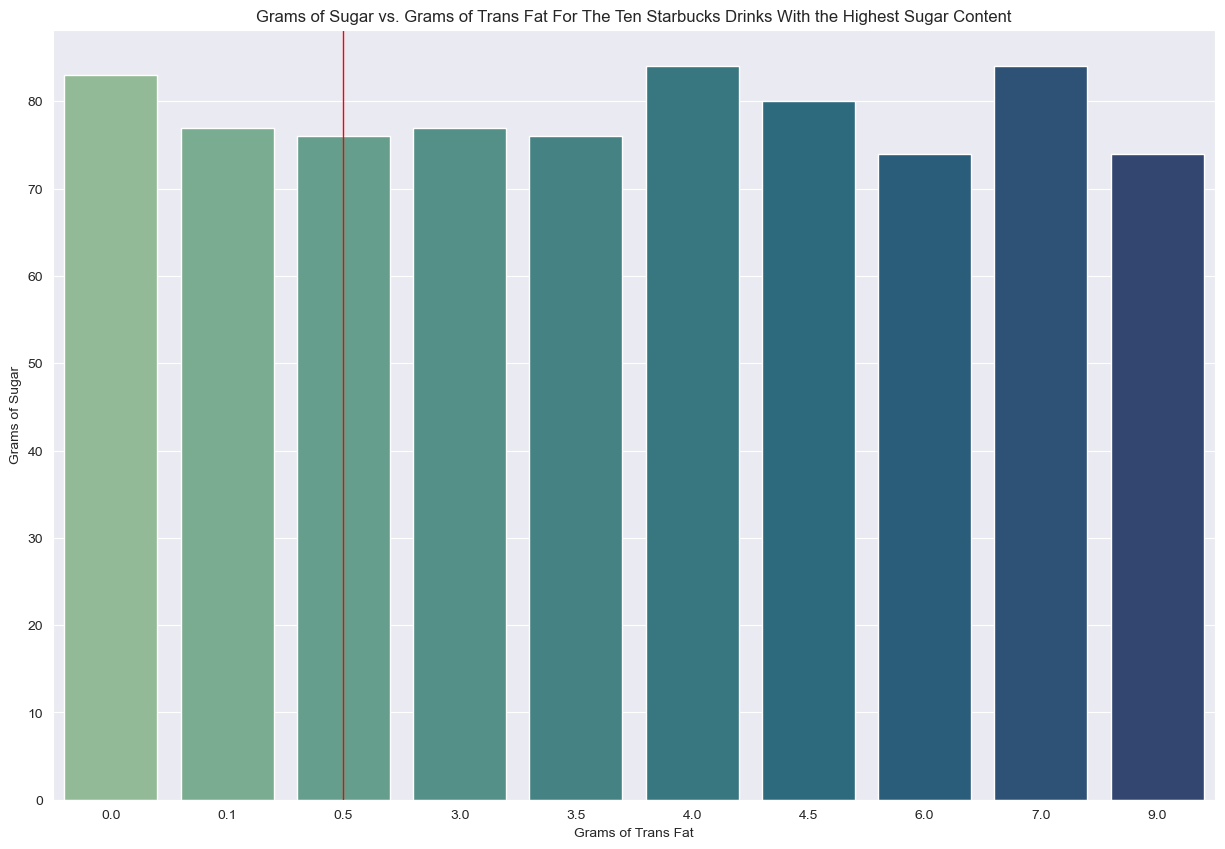

In [267]:
plt.figure(figsize = (15,10))
ax5 = sns.barplot(data = starbs_top10_sugar, x = 'Trans Fat (g) ', y = ' Sugars (g)', palette = 'crest')    
ax5.axvline(x=2, color='red', linestyle='-', linewidth=1)
plt.xlabel('Grams of Trans Fat')
plt.ylabel('Grams of Sugar')
plt.title('Grams of Sugar vs. Grams of Trans Fat For The Ten Starbucks Drinks With the Highest Sugar Content')
plt.savefig('transfatvssugar.png', bbox_inches = 'tight', pad_inches = 1)

That vertical red line is the max daily reccomend trans fat intake from the World Health Organization. Out of the 10 drinks that contain the most sugar on the starbucks menu, 7 contain more than 2, and 5 contain double or more than double. That's really bad. 

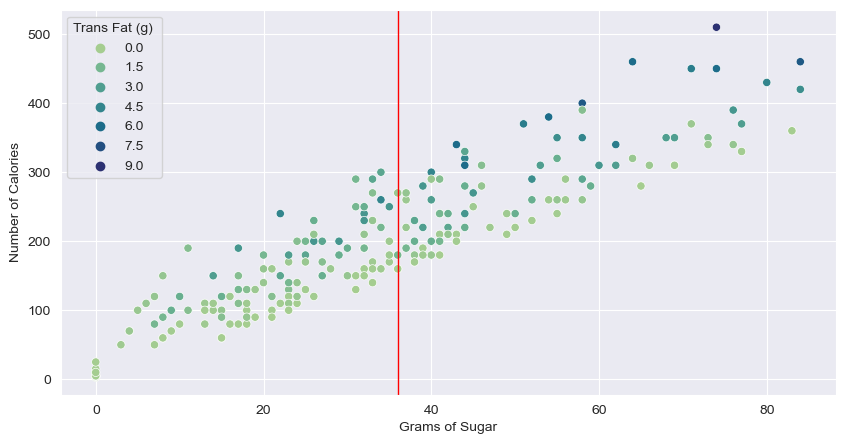

In [270]:
plt.figure(figsize = (10,5))
ax6 = sns.scatterplot(data = starbs, x = ' Sugars (g)', y = 'Calories', hue = 'Trans Fat (g) ', palette = 'crest')
ax6.axvline(x=36, color='red', linestyle='-', linewidth=1)
plt.xlabel('Grams of Sugar')
plt.ylabel('Number of Calories')
plt.savefig('Sugar vs Calories and Trans Fat.png', bbox_inches = 'tight', pad_inches = 1)

This is an obvious but important comparison to make, but the more sugar a drink has, the more calories it has, and the more calories, the more trans fats. These drinks are just the perfect concoction of everything that's terrible for your body.

In [219]:
starbs.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175.0
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260.0
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330.0
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410.0
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75.0


In [220]:
starbs.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

I havent mentioned a major reason people buy drinks from Starbucks in the first place yet, the caffeine. Many people rely on these drinks to wake them up in the morning. 

I'm a coffee drinker myself, I understand the need for that morning boost! Do the drinks with the most caffeine content also contain high levels of sugar?

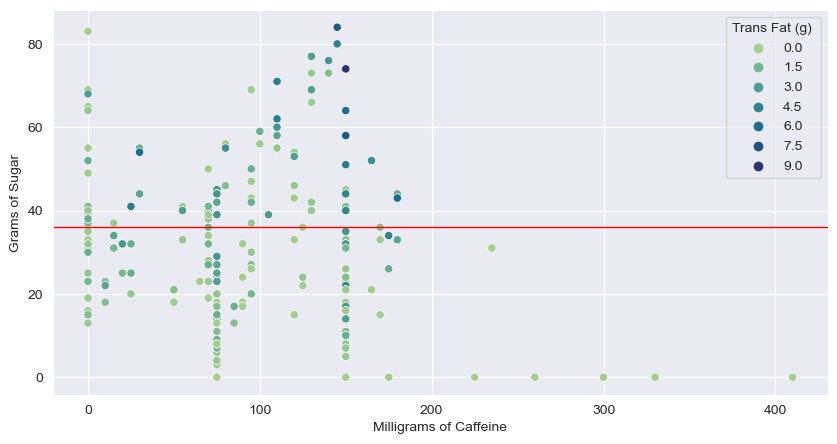

In [273]:
plt.figure(figsize = (10,5))
ax7 = sns.scatterplot(data = starbs, x = 'Caffeine (mg)', y = ' Sugars (g)', hue = 'Trans Fat (g) ', palette = 'crest')
plt.xlabel('Milligrams of Caffeine')
plt.ylabel('Grams of Sugar')
ax7.axhline(y=36, color='red', linestyle='-', linewidth=1)
plt.savefig('Caffeine and Sugar.png', bbox_inches = 'tight', pad_inches = 1)

Well, the good news is, if caffeine is all you care about, the options with the highest caffeine have zero sugar. 

Look at that drink in the top right with 80 grams of sugar and zero caffeine; that's just a milkshake!

Many people, of course, don't do that because they don't taste nearly as good as the sugary, high-fat drinks.

So, which drink is the worst offender? Which drink contains the highest amounts of sugars and fats? It's likley just the drink with the most calories, let's look. 

In [309]:
top_3_calories = starbs.sort_values(by = 'Calories', ascending = False).head(3)
top_3_calories = top_3_calories.reset_index(drop = True)
top_3_calories.to_csv('Top3', index = False)

The White Chocolate Mocha made with 2% milk, the Java Chip Frapp, and the White Chocolate Mocha made with soymilk are the three worst offenders on the menu. They each have over three times the recommended trans fat intake and over double the recommended sugar intake. That's bad. Really bad.

What's the point in my sharing all this?

I don't have anything against Starbucks, but I am a firm believer that drinks like these are a massive reason why people these days may feel they don't have enough energy to get through the work day.

Ingesting sugar and trans fats in these quantities alone is bad, but to ingest all this within an hour of waking up and have it be the first source of nutrients your body gets?

It makes me shake just thinking about it!

Something I would like to investigate further is data on customer orders in America to see what people are ordering and compare their orders with the sugar and fat content we have here. We could begin to explore just how much sugar and fat Americans are consuming from Starbucks alone and start to look at other trends associated with overall health and how it relates to their Starbucks orders.

Do people who generally order these high sugar, high-fat drinks make equally poor nutrition choices elsewhere? What about people's orders and their exercise habits? That would be interesting to look at.